In [ ]:
import pandas as pd

# Load the Amazon Review CSV file from Kaggle Dataset
# Using 'sep' to skip problematic lines
df = pd.read_csv("/content/sample_data/Reviews.csv", sep=',', on_bad_lines='skip')

# Preview the data
display(df[['Score', 'Text']].head())

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [ ]:
# To Keep only the important columns
df = df[['Score', 'Text']].dropna()

# Remove neutral reviews (Score == 3)
df = df[df['Score'] != 3]

# Label sentiment
df['Sentiment'] = df['Score'].apply(lambda x: 'positive' if x > 3 else 'negative')

# Reset index
df.reset_index(drop=True, inplace=True)

# Preview
df.head()


,Score,Text,Sentiment
0,5,I have bought several of the Vitality canned d...,positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,negative
2,4,This is a confection that has been around a fe...,positive
3,2,If you are looking for the secret ingredient i...,negative
4,5,Great taffy at a great price. There was a wid...,positive


In [ ]:
!pip install textblob vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# TextBlob polarity
df['TextBlob_Polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# VADER compound score
df['VADER_Compound'] = df['Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Preview
df[['Text', 'Sentiment', 'TextBlob_Polarity', 'VADER_Compound']].head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


,Text,Sentiment,TextBlob_Polarity,VADER_Compound
0,I have bought several of the Vitality canned d...,positive,0.450000,0.9441
1,Product arrived labeled as Jumbo Salted Peanut...,negative,-0.033333,-0.5664
2,This is a confection that has been around a fe...,positive,0.133571,0.8138
3,If you are looking for the secret ingredient i...,negative,0.166667,0.4404
4,Great taffy at a great price. There was a wid...,positive,0.483333,0.9468


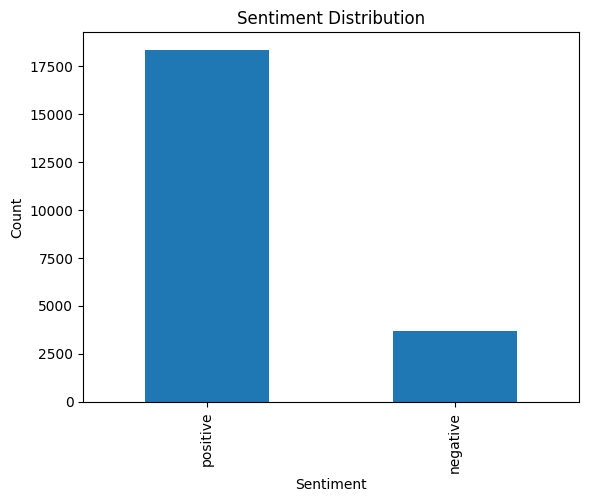

In [ ]:
import matplotlib.pyplot as plt

df['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


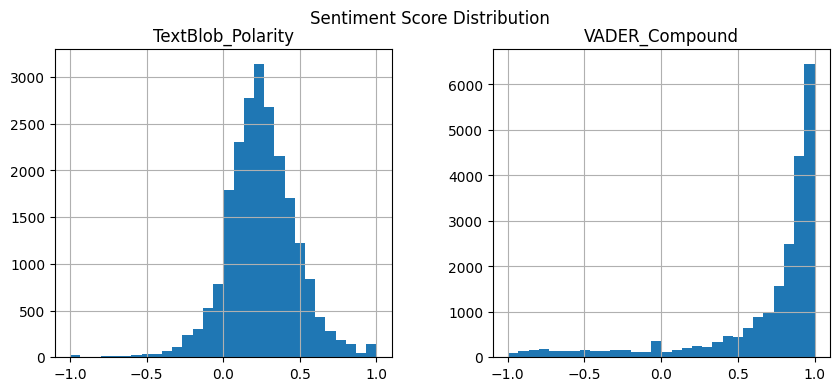

In [ ]:
df[['TextBlob_Polarity', 'VADER_Compound']].hist(figsize=(10,4), bins=30)
plt.suptitle('Sentiment Score Distribution')
plt.show()


In [ ]:
df.to_csv("processed_sentiment_reviews.csv", index=False)
